# Problem Statement

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

We will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

# Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("All libraries are loaded succesfully")

All libraries are loaded succesfully


In [2]:
df = pd.read_csv("Churn.csv")
print("Customer Churn Analysis data loaded succesfully")

Customer Churn Analysis data loaded succesfully


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.shape

(7043, 21)

So, in this dataset there are 7043 rows and 21 columns are present.

# Label Description

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

-->Feature column:-

customerID - Individual ID of the customer

Gender - gender of the customer(male/female)

SeniorCitizan - Whether a customer is senior citizen or not (0-no/ 1-yes)

Partner- Whether the customer have partner (yes/no)

Dependents- Whether customer have dependents

tenure - tenure of a customer with the company in months

PhoneService - Does the customer optef for phone service(yes/no)

Multiplelines - Does the customer have multiple lines.

InternetService - Does the customer choosed for internet service. if yes then how it is connected (via DSL/FIber optic)

OnlineSecurity - Does the customer opted for online security.

OnlineBackup -Does the customer opted for online backup service.

DeviceProtection - Does the customer have opted for device protection service.

TechSupport - Tech support provided by the company

StreamingTV - Does the customer stream TV

StreamingMovies - Does the customer stream movies

Contract - Contract between the customer and the company

PaperlessBilling - Have the customer selected for paper less billing

PaymentMethod - How the payment is done by the customer

MonthlyCharges- Charges per month

TotalCharges- Total charges

-->Target column:-

Churn- Whether the customer stopped using the services of the company and switched to some other company (yes/no).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We cn clearly see that we have 7043 rows with no null values in our dataset. We have three types of data types in our data set i.e. int,float and object.
And, target variable i.e churn is categorical variable.

In [8]:
print("VALUE COUNT OF EACH COlUMNS")
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

VALUE COUNT OF EACH COlUMNS
1810-MVMAI    1
1488-SYSFC    1
0274-JKUJR    1
3387-VATUS    1
0376-YMCJC    1
             ..
8069-RHUXK    1
4707-YNOQA    1
4501-VCPFK    1
6734-PSBAW    1
6861-OKBCE    1
Name: customerID, Length: 7043, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity

So target attribute CHURN has-

NO values have 5174 counts & YES values  have 1869 counts

# Exploratory data analysis

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

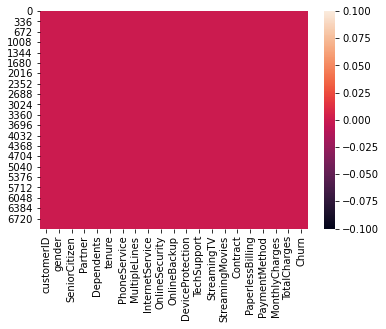

In [10]:
#heatmap of the null values
sns.heatmap(df.isnull())

NO null values are present in the datatset

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Here, each column is justified with data types but total charges is in object whereas it should be float. lets convert it into that.

In [12]:
# df['TotalCharges'] = df['TotalCharges'].astype(float)
    
#tried the above code, but there are few values in total charges with "empty string"

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

seems fine now.

In [15]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

so here we can see after conversion there is 11 null values are presnt in the totalcharges. 

In [16]:
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)

In [17]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

NOw, no null values are presnt in the datatset.

In [18]:
len(df['customerID'].unique())

7043

We will remove the customerid column, no use of it

In [19]:
df.drop(columns='customerID',axis=1,inplace=True)

In [20]:
df.shape

(7043, 20)

In [21]:
for i in df.columns:
    print(i, len(df[i].unique()))

gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6531
Churn 2


We can see that there are only 3 columns with continuous data i.e tenure,montlycharges& totalcharges, remaining all are categorical data.

# Data Visualization

# Univariate Analysis

<AxesSubplot:xlabel='Churn', ylabel='count'>

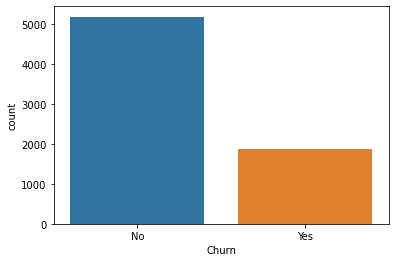

In [22]:
sns.countplot(df['Churn'])

In [23]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

So clearly visbile that there is more number of NO values in churn as compares to Yes.

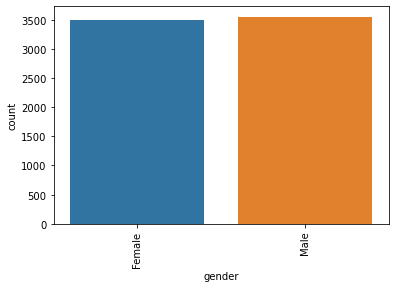

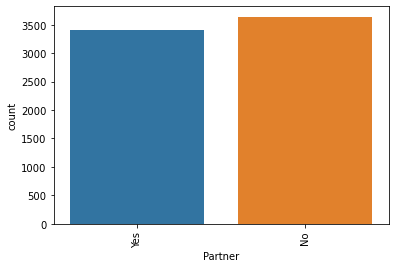

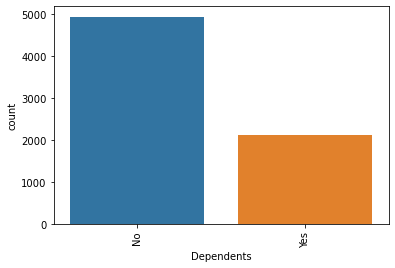

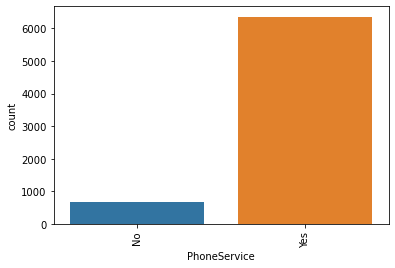

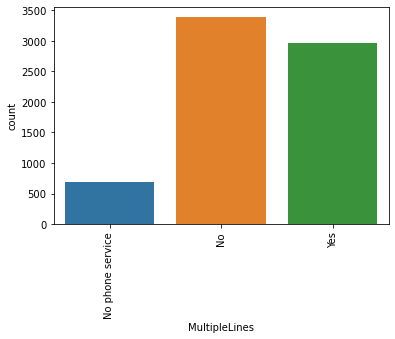

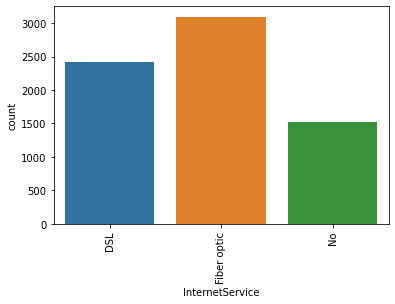

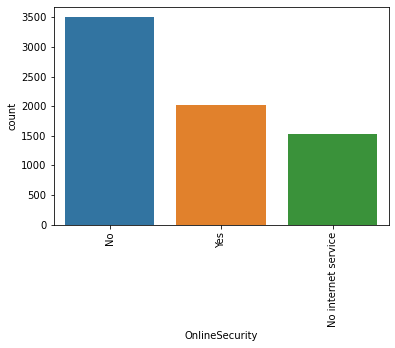

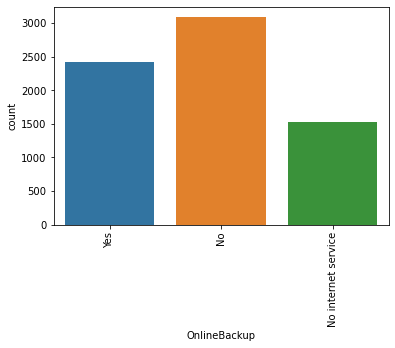

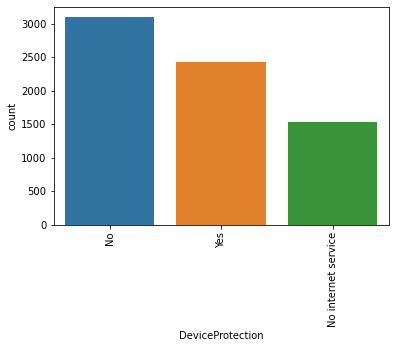

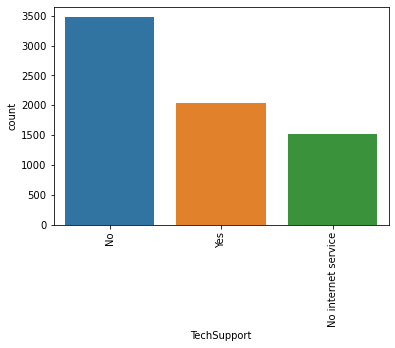

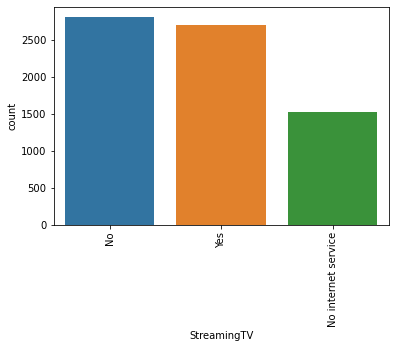

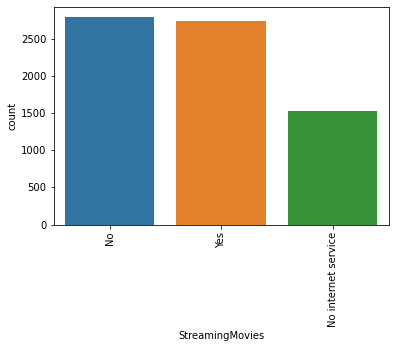

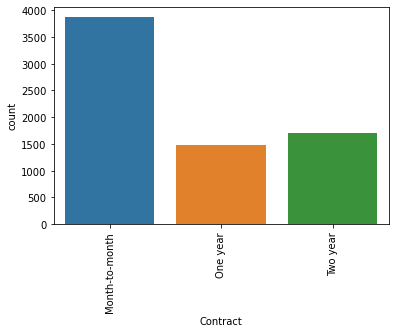

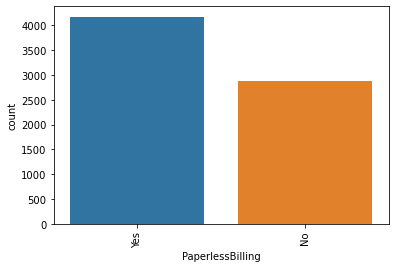

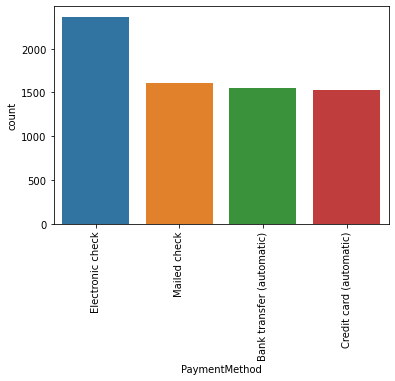

In [24]:
for i in df.columns:
    if df[i].dtypes==object and i != 'Churn':
        sns.countplot(df[i])
        plt.xticks(rotation=90)
        plt.show()

So, from the above observations we can find out that-


There are almost equivalent number of male and female in our dataset.

Customers with no partners are slightly high in numbers.

Majority of customers do not have dependents.

Majority of customers having phone service.

Fiber optic opted  as an Internet services to most of the customers.

No online security has the highest number.

No online backup has the highest number

No device protection has the highest number

NO Tech support has the highest number.

Customers those who have selected TV streaming are also streaming movies.

Majority of customers have month-to-month contract.

More customers have opted for paperless billing.

More Customers prefer to pay via electronic-check.

Month-to-Month contract has the highest churn


(array([1187.,  419.,   85.,  106.,  102.,  263.,  309.,  330.,  249.,
         224.,  435.,  460.,  503.,  450.,  444.,  425.,  393.,  365.,
         198.,   96.]),
 array([ 18.25 ,  23.275,  28.3  ,  33.325,  38.35 ,  43.375,  48.4  ,
         53.425,  58.45 ,  63.475,  68.5  ,  73.525,  78.55 ,  83.575,
         88.6  ,  93.625,  98.65 , 103.675, 108.7  , 113.725, 118.75 ]),
 <BarContainer object of 20 artists>)

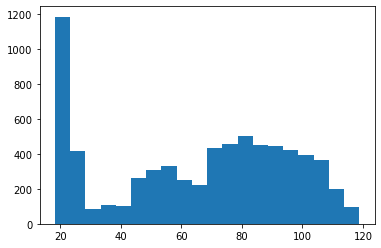

In [25]:
plt.hist(x=df['MonthlyCharges'],bins=20)

most of the customers have opted for low monthly charges (between 18-22)

(array([1881.,  828.,  687.,  552.,  368.,  303.,  263.,  245.,  223.,
         231.,  205.,  207.,  194.,  201.,  163.,  147.,  127.,   96.,
          83.,   39.]),
 array([  18.8,  452.1,  885.4, 1318.7, 1752. , 2185.3, 2618.6, 3051.9,
        3485.2, 3918.5, 4351.8, 4785.1, 5218.4, 5651.7, 6085. , 6518.3,
        6951.6, 7384.9, 7818.2, 8251.5, 8684.8]),
 <BarContainer object of 20 artists>)

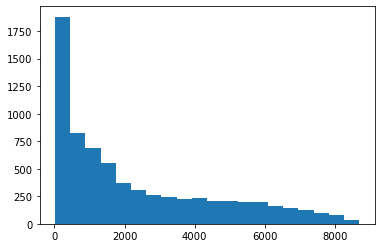

In [26]:
plt.hist(df['TotalCharges'],bins=20)

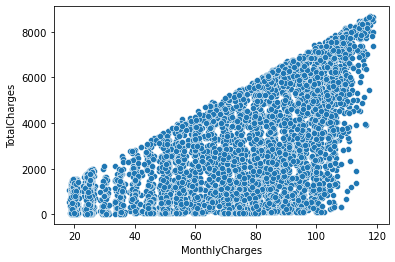

In [27]:
#relation between monthly and total charges

sns.scatterplot(df['MonthlyCharges'],df['TotalCharges'])
plt.show()

Total charges increases with increase in monthly charges, linearly.

<AxesSubplot:xlabel='tenure', ylabel='count'>

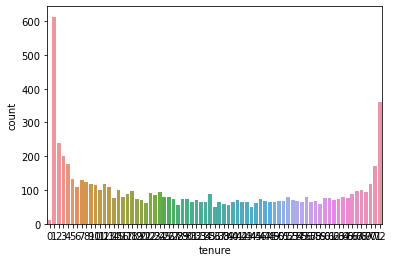

In [28]:
sns.countplot(df['tenure'])

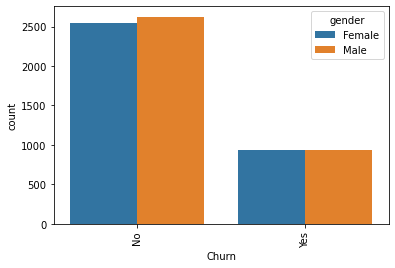

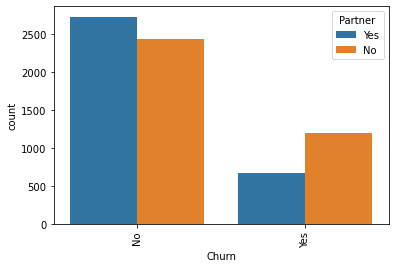

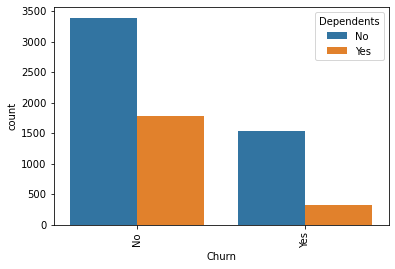

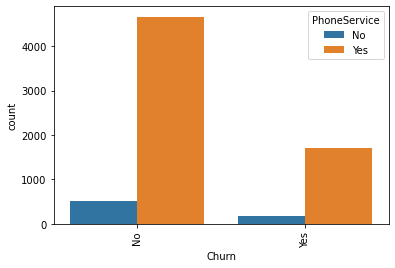

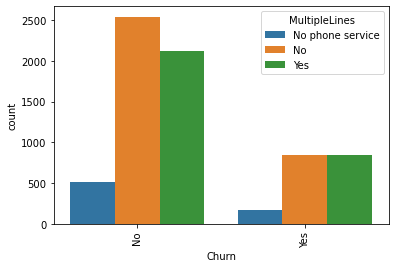

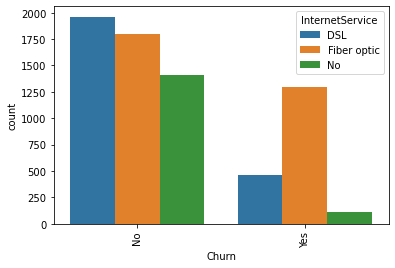

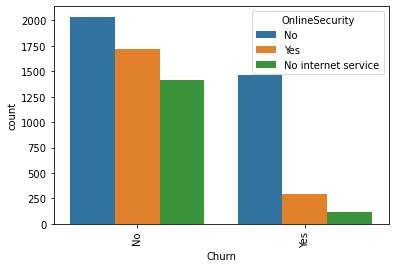

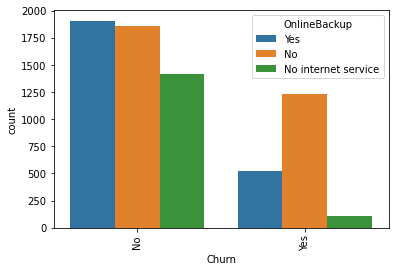

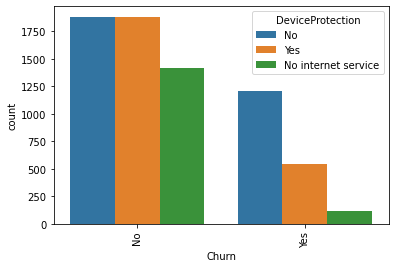

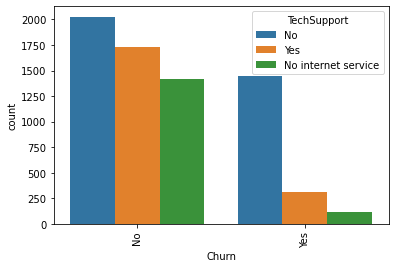

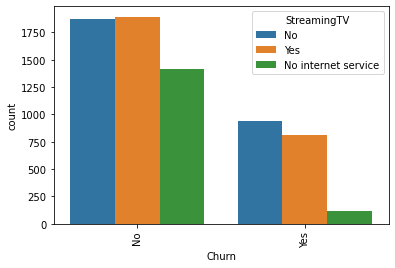

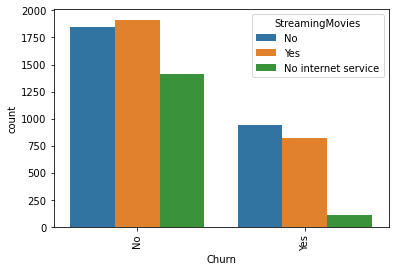

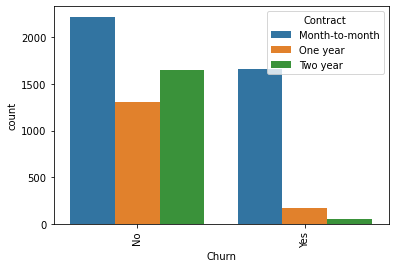

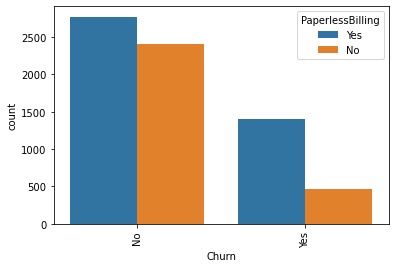

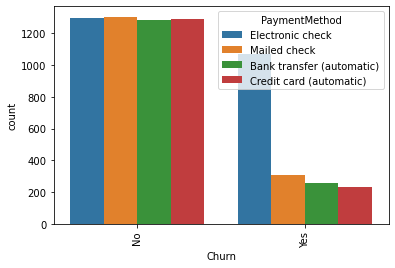

In [29]:
for i in df.columns:
    if df[i].dtype == 'object' and i != 'Churn':
        
        sns.countplot(df['Churn'],hue = df[i])
        plt.xticks(rotation=90)
        plt.show()

Male and females are almost equal numbers in churn

not Dependents are having more numbers in churn.

No tech support has the highest churn

No online security has the highest churn

No online backup has the highest churn

No device protection has the highest churn

electronic check payment method has highest churn

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

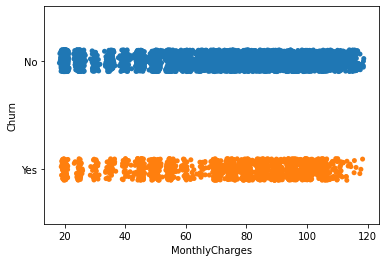

In [30]:
sns.stripplot(x=df['MonthlyCharges'],y=df['Churn'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

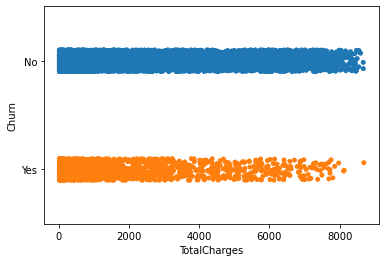

In [31]:
sns.stripplot(x=df['TotalCharges'],y=df['Churn'])

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

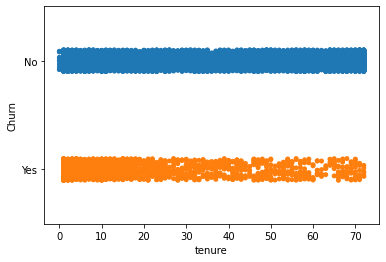

In [32]:
sns.stripplot(x=df['tenure'],y=df['Churn'])

# Correlation

In [33]:
print('Data description')
df.describe().T

Data description


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.000,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80


SeniorCitizxen is having mean of 0.16 with std of 0.36

Tenure  range vary from 0 to 72, with mean 32.37

Monthly charges  range vary from minm 18.25 to maximum 118.75

Total charges range vary from, min of 18.80 and maxm of 8684.80

<AxesSubplot:>

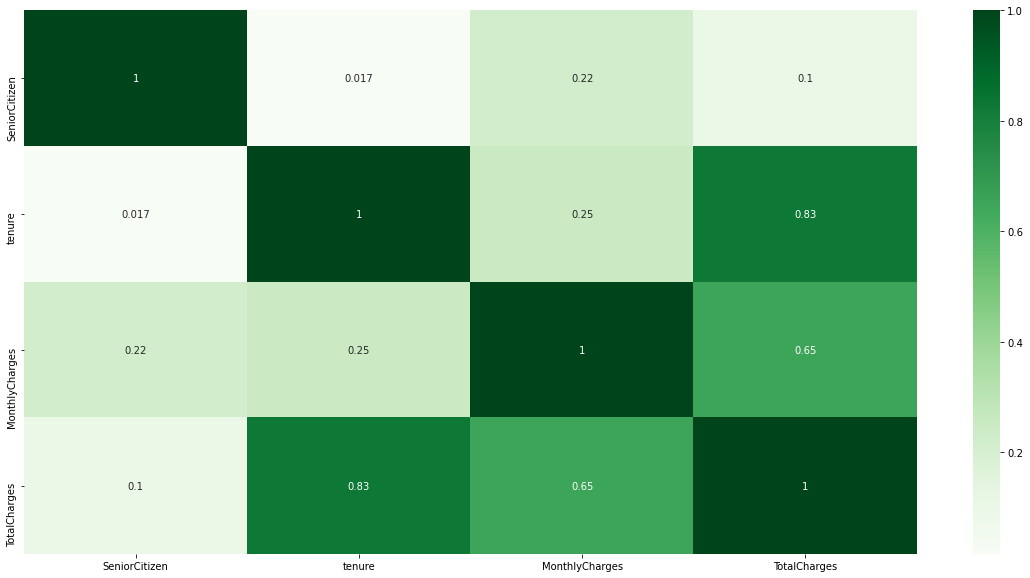

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

from the above observations -

tenure is strongly correlated with total charges, i.e 0.83

Monthly charges and total charges are also high positively correlated, i.e 0.65

# Data Cleaning

# Outlier checking

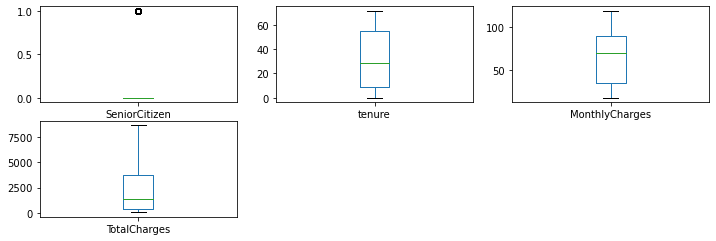

In [35]:
df.plot(kind='box',subplots=True,layout=(12,3),figsize=(12,25))
plt.show()

No outliers present in the datatets. So we dont need to treat with zscore.

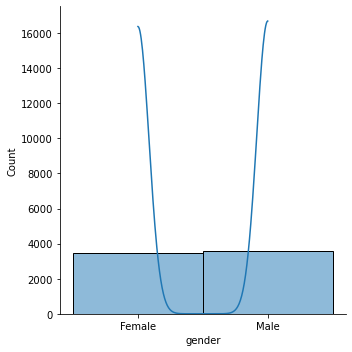

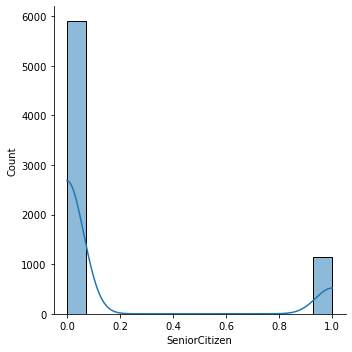

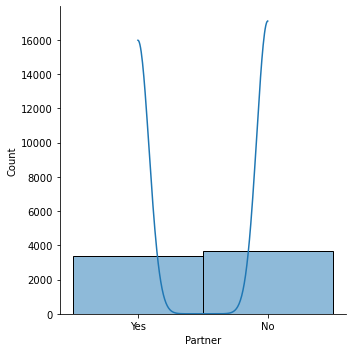

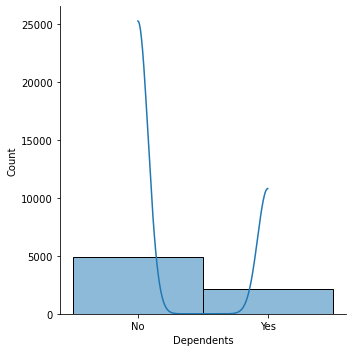

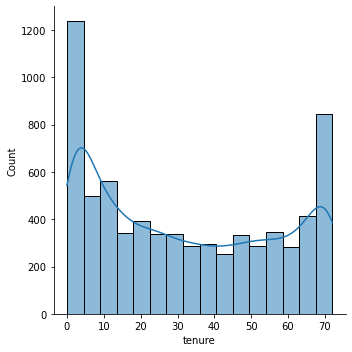

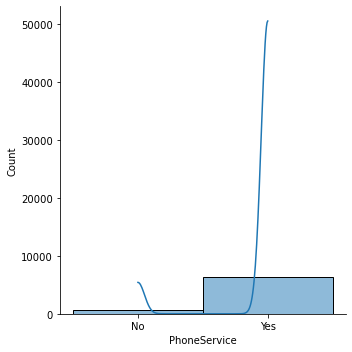

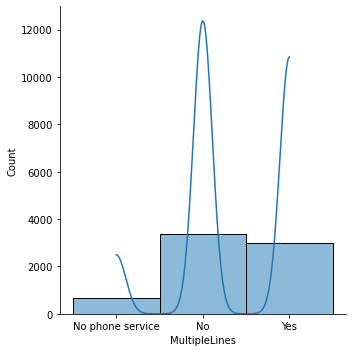

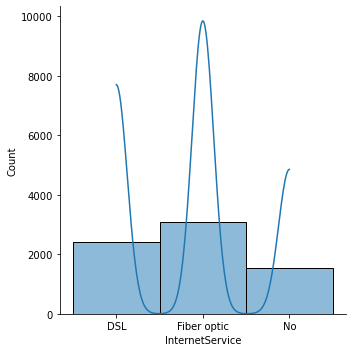

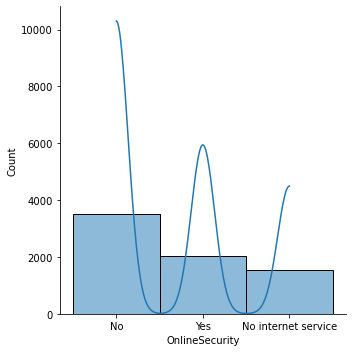

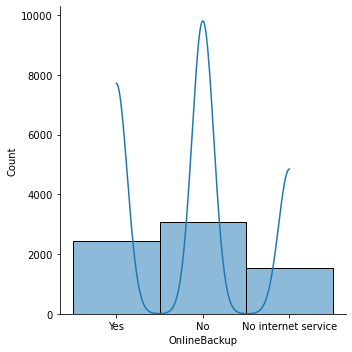

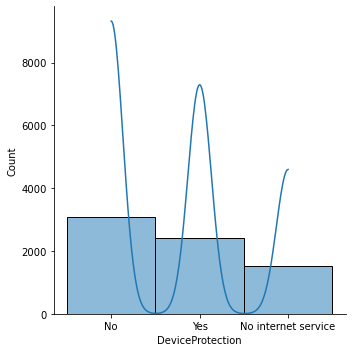

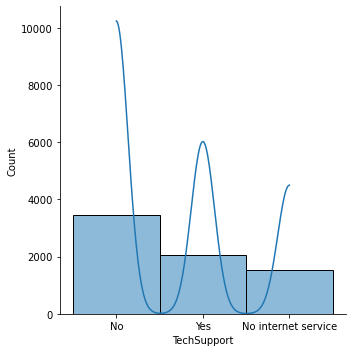

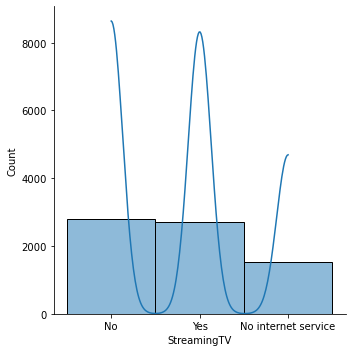

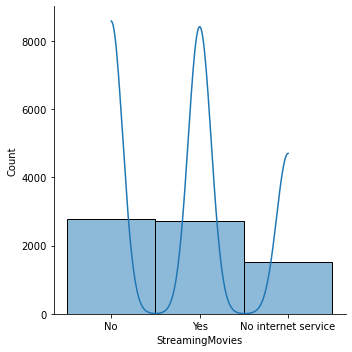

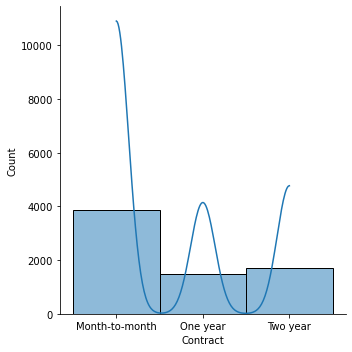

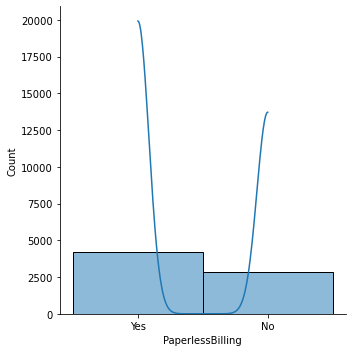

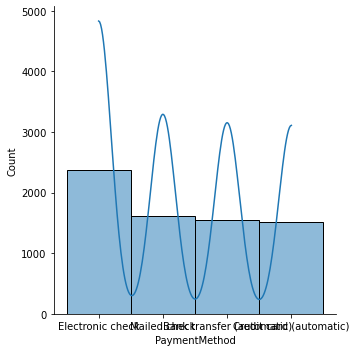

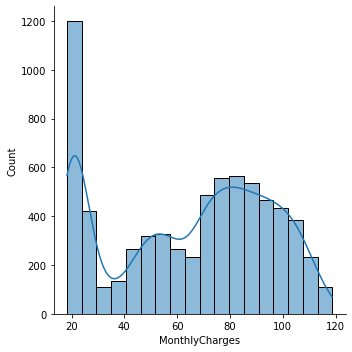

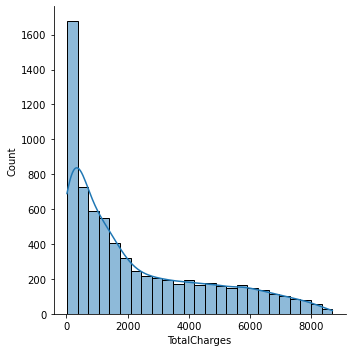

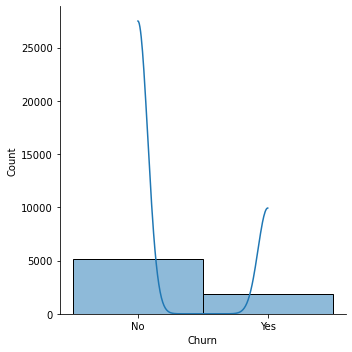

In [36]:
for i in df.columns:
    sns.displot(df[i],kde=True)
    plt.show()

normal distribution is not presnt in the dataset, so skewness is there presnt.

# Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes==object:
        df[i] = le.fit_transform(df[i])

In [38]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [39]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now we are going to divide the feature columns and target.

In [40]:
x = df.drop(['Churn'],axis=1)
y = df['Churn']

# Checking Skewness

In [41]:
#should be in between -0.5 to +0.5
x.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963789
dtype: float64

# Handling skewness

Total charges is right skewed

In [42]:
x['TotalCharges']=np.cbrt(x['TotalCharges'])

In [43]:
x['SeniorCitizen']=np.log1p(x['SeniorCitizen'])

In [44]:
x['PhoneService']=np.log1p(x['PhoneService'])

In [45]:
x.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.012996
dtype: float64

# Standard Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
k=sc.fit_transform(x)
x=pd.DataFrame(k,columns = x.columns)

In [47]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.685885
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205869
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346302
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183960
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230212


In [48]:
y.tail(3)

7040    0
7041    1
7042    0
Name: Churn, dtype: int32

In [49]:
x.shape,y.shape

((7043, 19), (7043,))

# Modeling

In [59]:
#models froms sickit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score

##ensemble technique
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


#Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [51]:
maxacc=0
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is',maxacc,'on random state', maxrs)

Best accuracy is 0.8215806909607194 on random state 24


We are getting best result at random state 24 i.e 82%

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=24)

In [60]:
#models used for modelling

LR=LogisticRegression()
RFC=RandomForestClassifier()
ADA=AdaBoostClassifier()
KNN=KNeighborsClassifier()
DTC=DecisionTreeClassifier()
GNB=GaussianNB()
SV=SVC()


In [61]:
model=[LR,RFC,ADA,KNN,DTC,GNB,SV]



****************** LogisticRegression() *******************


accuracy score: LogisticRegression()
0.8215806909607194
[[1454  131]
 [ 246  282]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1585
           1       0.68      0.53      0.60       528

    accuracy                           0.82      2113
   macro avg       0.77      0.73      0.74      2113
weighted avg       0.81      0.82      0.81      2113

Cross Validation Score: 0.8054804947093361


auc score: 0.7257205334098079


roc_auc_score =  0.7257205334098079


AxesSubplot(0.125,0.808774;0.62x0.0712264)





****************** RandomForestClassifier() *******************


accuracy score: RandomForestClassifier()
0.808329389493611
[[1451  134]
 [ 271  257]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1585
           1       0.66      0.49      0.56       528

    accuracy                           0.81    

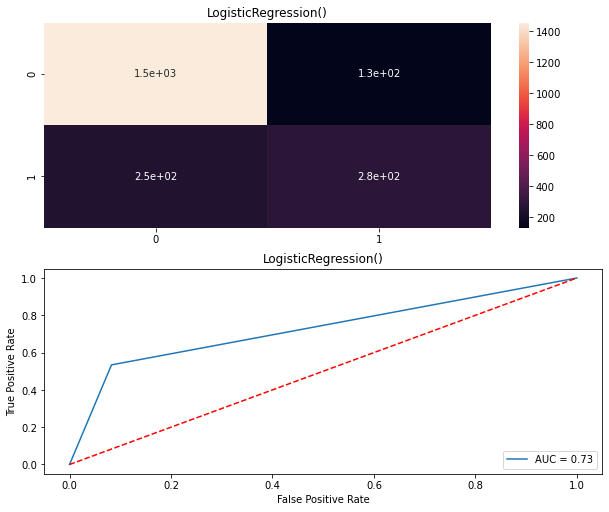

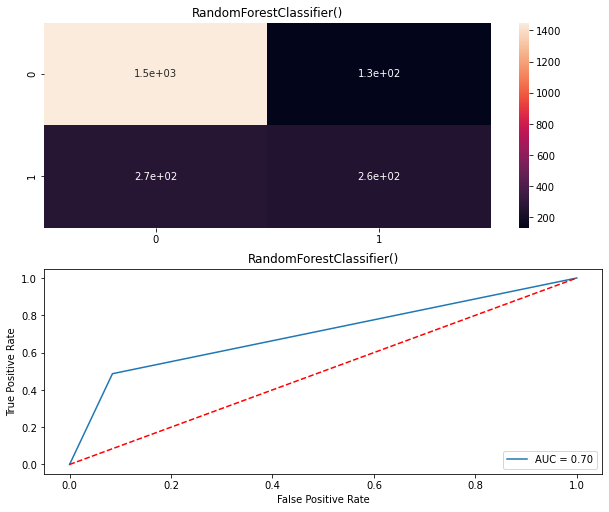

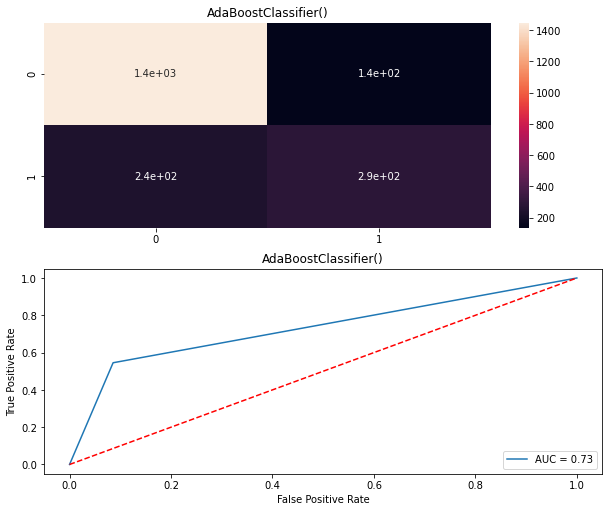

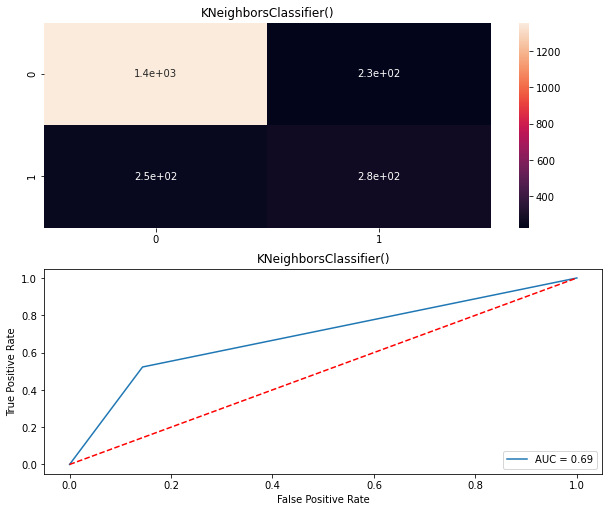

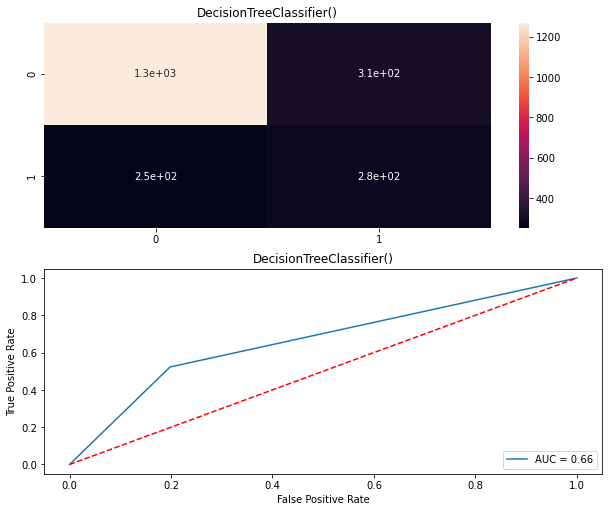

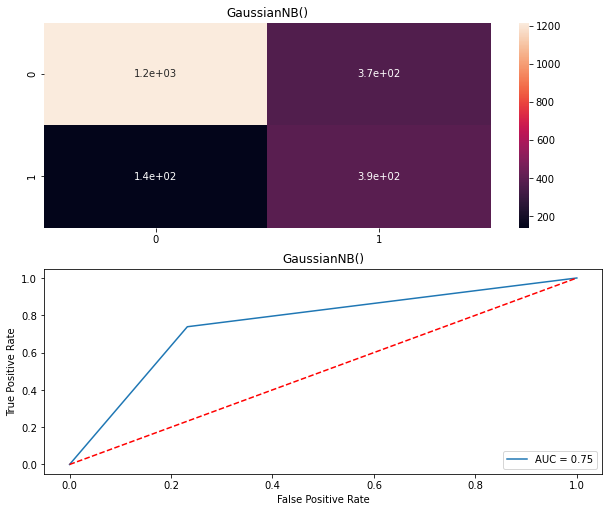

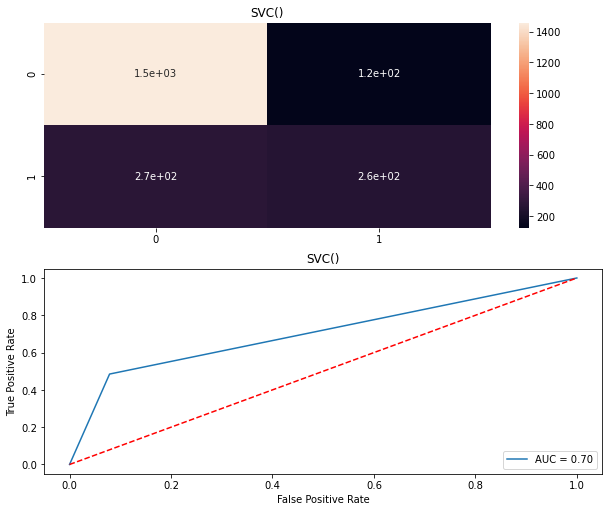

In [62]:
score=[]
cvs=[]
rocscore=[]
for i in model:
    print('\n')
    print('******************',i,'*******************')
    print('\n')
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    
    print('accuracy score:',i)
    score=accuracy_score(y_test,pred)
    print(score)
    
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print(classification_report(y_test,pred))
    
    cross=cross_val_score(i, x, y, cv=5, scoring='accuracy').mean()
    print('Cross Validation Score:',cross)
    cvs.append(cross)
    print('\n')
    
    print('auc score:',roc_auc_score(y_test,pred))
    print('\n')
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(i)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

# AdaBoost Classifier is performing best with accuracy of 82%, cross val score of 80% and auc score of 73%

# Hyper Parameter Tuning

In [64]:
#parameter list of AdaBoost Classifier

from sklearn.model_selection import GridSearchCV

parameters={'n_estimators':[100,200,300],'learning_rate':[0.001,0.01,0.1,1]}
GCV=GridSearchCV(ADA,parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 200, 300]})

In [65]:
GCV.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [66]:
predgcv=GCV.best_estimator_.predict(x_test)

In [70]:
print('Accuracy score:')
print(accuracy_score(y_test,predgcv))
print(confusion_matrix(y_test,predgcv))
print(classification_report(y_test,predgcv))
cvs_score=cross_val_score(GCV.best_estimator_, x, y, cv=10,scoring='accuracy')
print('Cross Validation Score:',score.mean())
print('auc score:',roc_auc_score(y_test,predgcv))

Accuracy score:
0.8168480832938949
[[1471  114]
 [ 273  255]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1585
           1       0.69      0.48      0.57       528

    accuracy                           0.82      2113
   macro avg       0.77      0.71      0.73      2113
weighted avg       0.81      0.82      0.80      2113

Cross Validation Score: 0.8121154756270705
auc score: 0.7055151276168626


Here, we can see that there is increase by 1% in cross val score after hyper tuning the model

Text(0.5, 0, 'False Positive Rate')

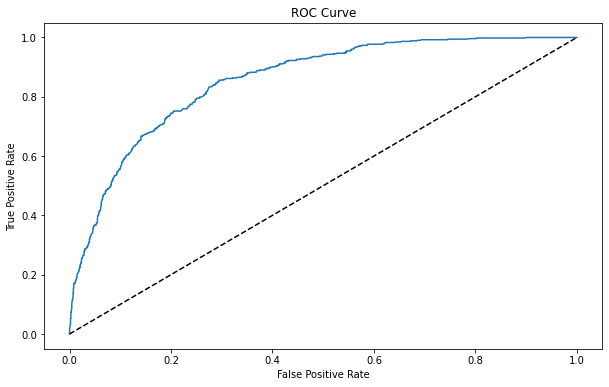

In [68]:
y_pred_prob=GCV.best_estimator_.predict_proba(x_test)[:,1]
    
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_prob)

plt.figure(figsize=(10,6))
plt.title("ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, label='ADA Boost classifier')
plt.plot([0,1],[0,1],'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# MOdel Saving

In [69]:
#import joblib
#joblib.dump(ada_mod,"Finalmodel.pkl")

# Completed-->